<a href="https://colab.research.google.com/github/fendiirfan/KNN_from_scratch/blob/main/Tubes_AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

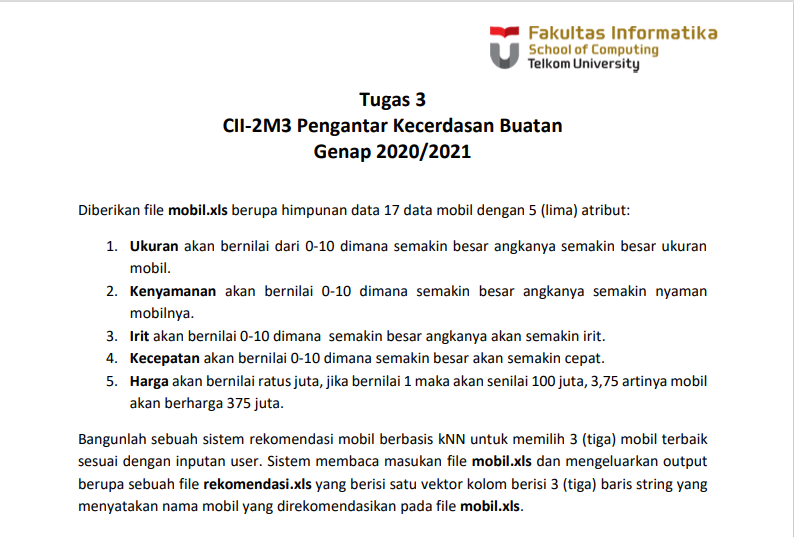
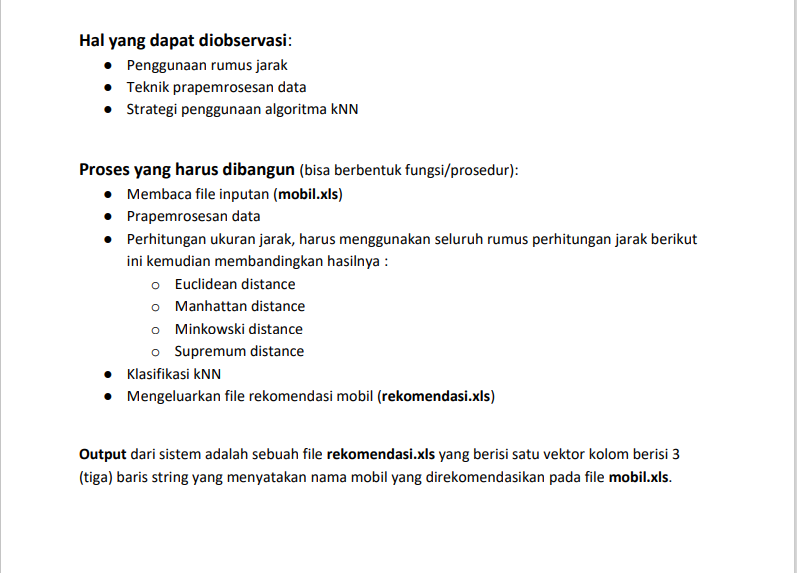
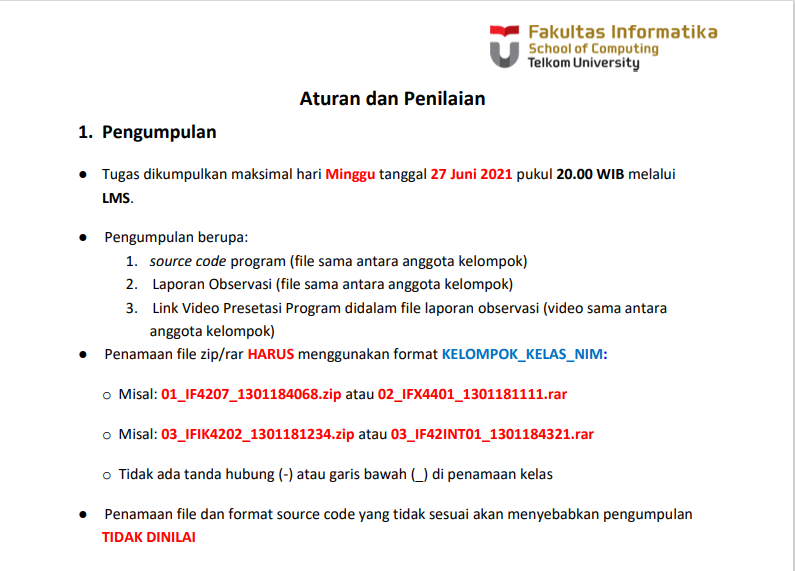
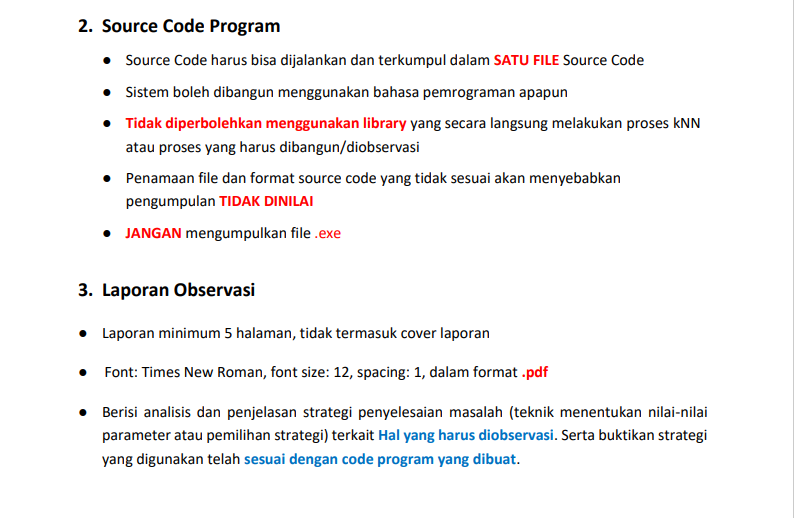
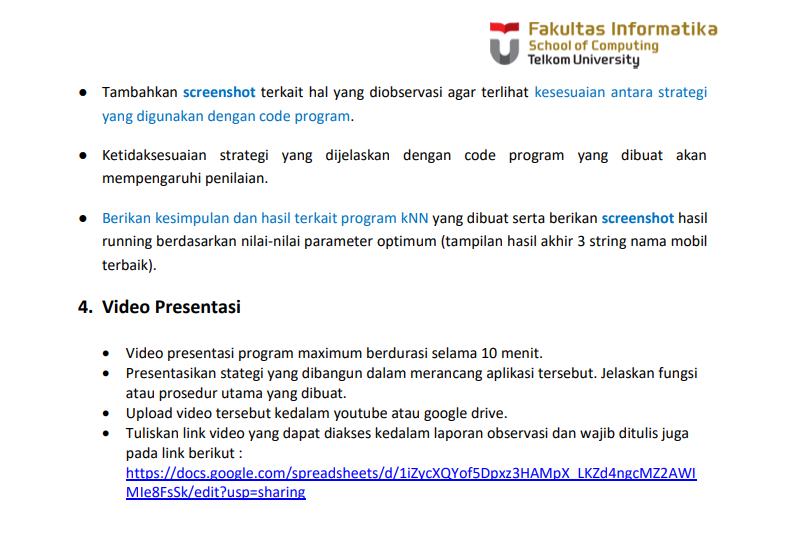
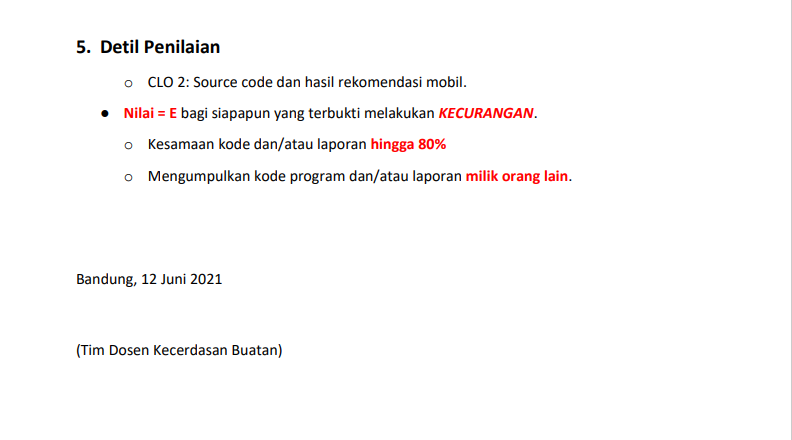
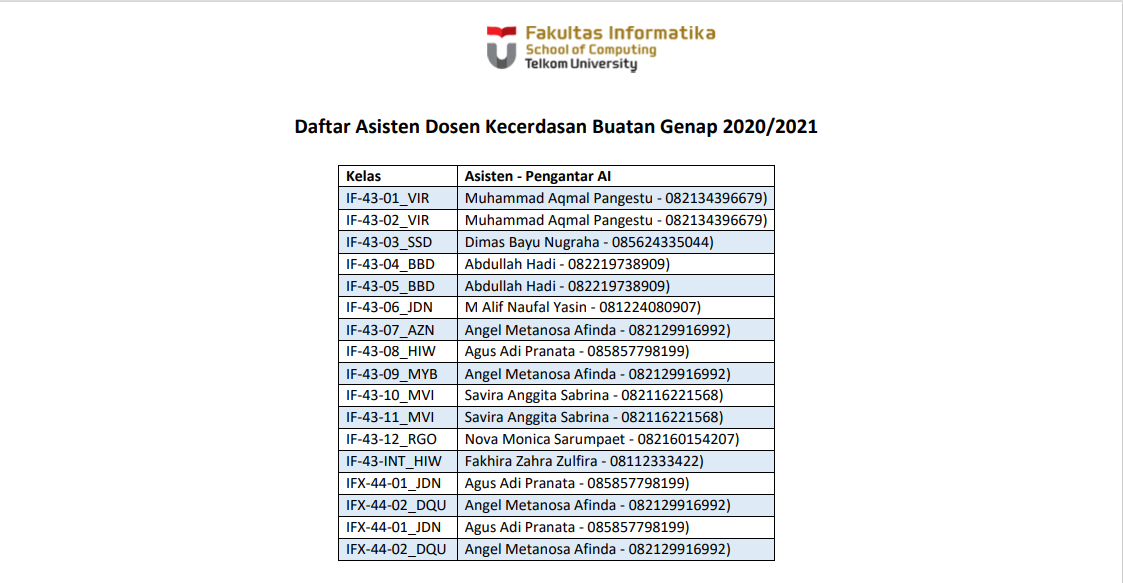

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
url='https://drive.google.com/file/d/1T3zb4g0UEq2yoSOAkTyyUoM3Uit4WnCw/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url2)

In [378]:
df

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25
5,Livina,7,7,6,7,2.10
6,Karimun,3,4,10,5,1.20
7,Toyota Innova,8,8,5,7,4.00
8,Alphard,9,10,4,8,10.00
9,Toyota Vios,5,7,9,8,2.50


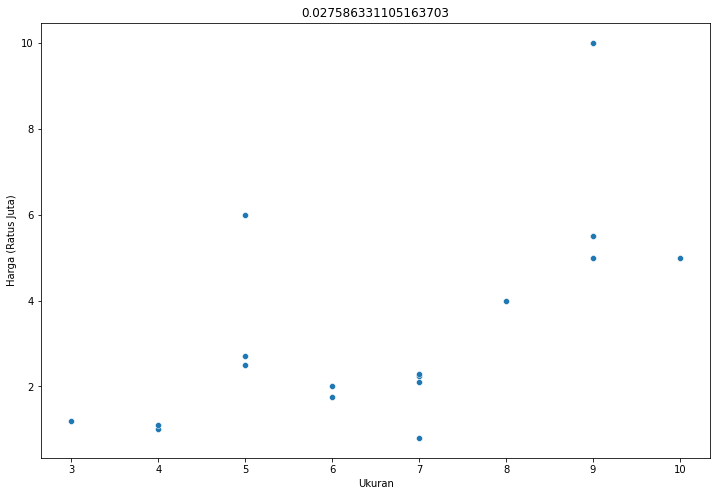

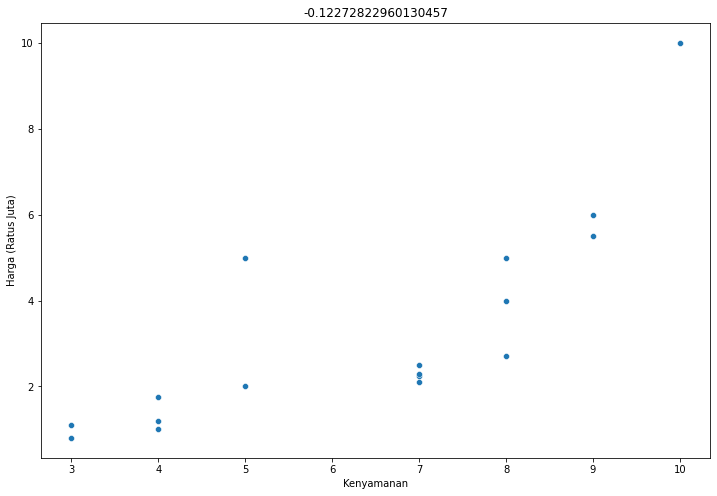

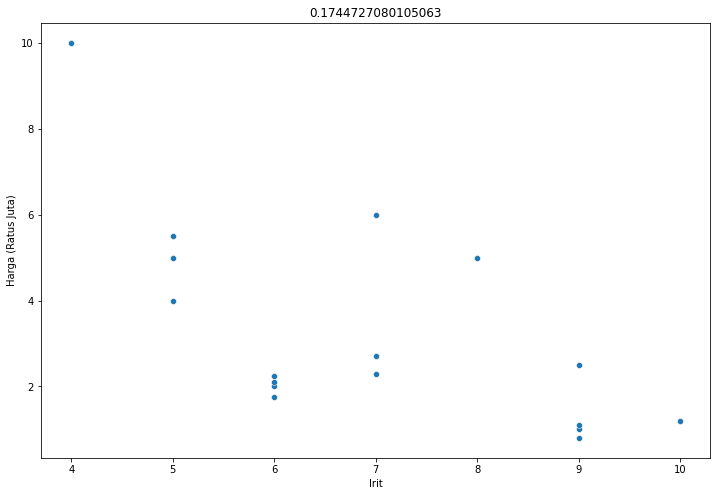

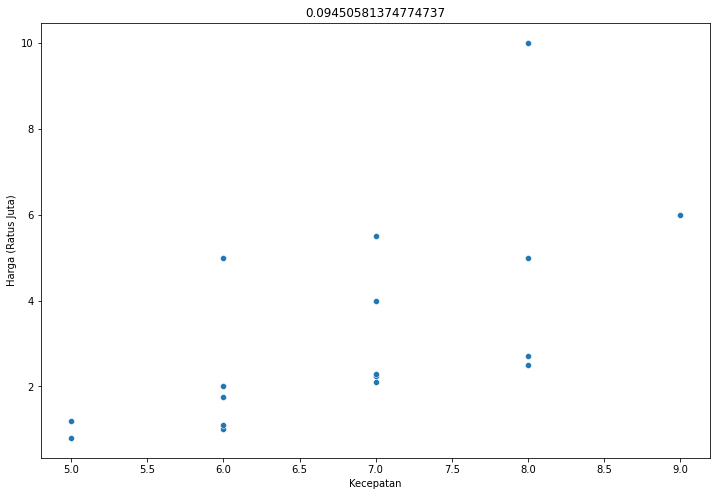

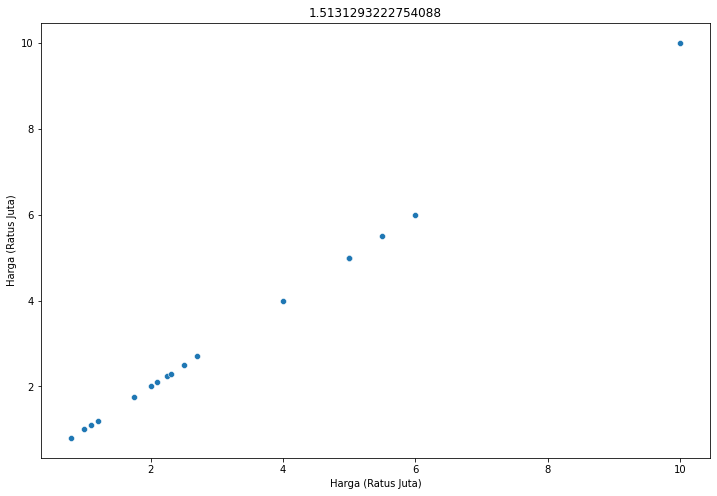

In [379]:
for i in df.columns:
  if i != 'Nama Mobil':
    plt.figure(figsize=(12,8))
    plt.title(df[i].skew())
    sns.scatterplot(x=i,y="Harga (Ratus Juta)",data = df)
    plt.show()

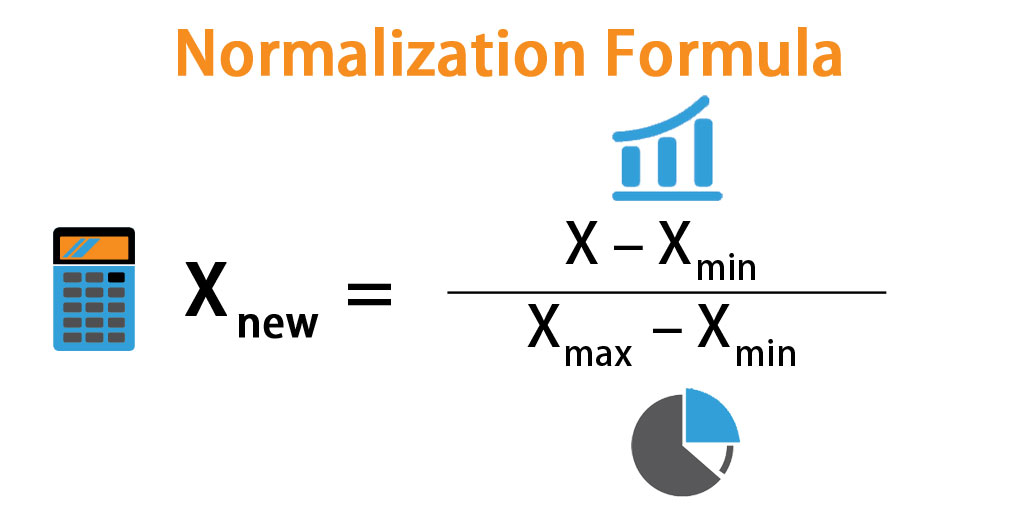

In [380]:
def getNormalization(df,inputUser):
  # IS : Masukan suatu dataframe dan list inputan dari user
  # FS : Mengembalikan dataframe dan list inputan dari user yang telah dinormalisasi menggunakan rumus min max scaller
  iter = 0
  for column in df.columns: #column untuk mengubah setiap kolom
      if column != 'Nama Mobil':
        xMin = df[column].min() #mendeklarasikan max dari kolom tersebut
        xMax = df[column].max() #mendeklarasikan min dari kolom tersebut

        # norm df
        temp = []
        for i in range(len(df[column])): # looping untuk mengubah setiap bari di suatu kolom
          temp.append((df[column][i]-xMin)/(xMax-xMin))
        df[column] = temp
        # norm input
        tempInput = (inputUser[iter]-xMin)/(xMax-xMin)
        inputUser[iter] = tempInput
        iter += 1
        
  return df,inputUser

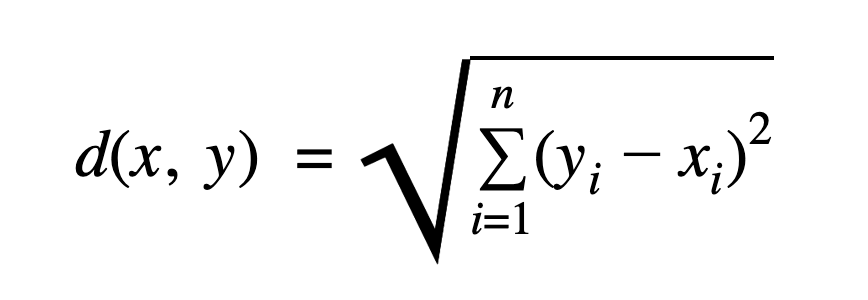


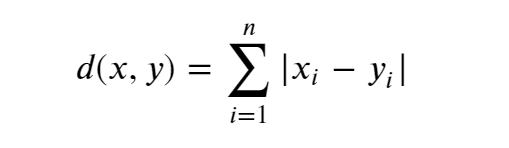

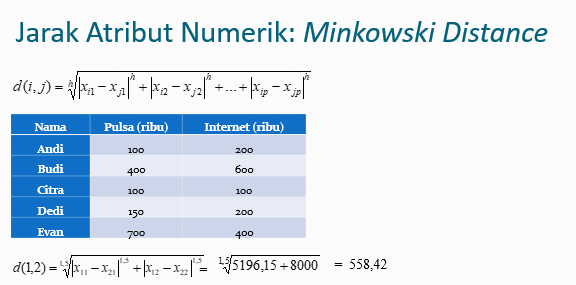

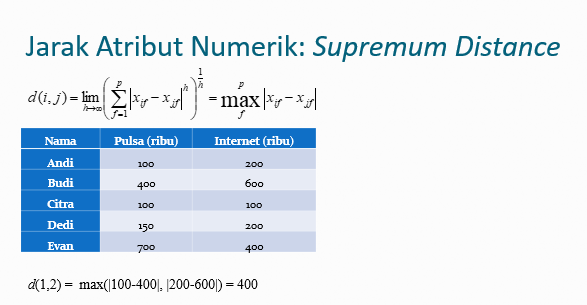

In [381]:
def euclideanDistance(valueColumn, inputUser):
    distance = 0
    for i in range(len(inputUser)):
        distance += (valueColumn[i] - pow(inputUser[i]),2)
    return pow(distance,0.5)
 
def manhattanDistance(valueColumn, inputUser):
    distance = 0
    for i in range(len(valueColumn)):
        distance += abs(valueColumn[i] - inputUser[i])
    return distance
 
def minkowskiDistance(valueColumn, inputUser, p=2):
    distance = 0
    for i in range(len(valueColumn)):
        distance += pow(abs(valueColumn[i] - inputUser[i]),p)
    return pow(distance,(1/p))
 
def supremumDistance(valueColumn, inputUser):
    distance = []
    for i in range(len(valueColumn)):
        distance.append(abs(valueColumn[i] - inputUser[i]))
    return max(distance) 

In [382]:
def getKNN(x, inputUser, k):
  
    euclidean = []
    manhattan = []
    minkowski = []
    supremum = []
 
    for i in range(len(x)):
        minkowski.append([minkowski_distance(x.iloc[i][1:].tolist(), inputUser), x['Nama Mobil'][i]])
        manhattan.append([manhattan_distance(x.iloc[i][1:].tolist(), inputUser), x['Nama Mobil'][i]])
        euclidean.append([euclidean_distance(x.iloc[i][1:].tolist(), inputUser), x['Nama Mobil'][i]])
        supremum.append([supremum_distance(x.iloc[i][1:].tolist(), inputUser), x['Nama Mobil'][i]])
 
    euclidean = sorted(euclidean)[:k]
    manhattan = sorted(manhattan)[:k]
    minkowski = sorted(minkowski)[:k]
    supremum = sorted(supremum)[:k]

    distanceDict = {
                'Euclidean': euclidean, 
                'Manhattan': manhattan, 
                'Minkowski': minkowski, 
                'Supremum': supremum
    }
 
    return distanceDict

7	7	6	7	2.10

In [383]:
ukuran = float(input('Input Ukuran: '))
kenyamanan = float(input('Input Kenyamanan: '))
irit = float(input('Input Irit: '))
kecepatan = float(input('Input Kecepatan: '))
harga = float(input('Input Harga: '))
k = int(input('Input Jumlah K: '))

inputUser = [ukuran, kenyamanan, irit, kecepatan, harga]
df,inputUser = getNormalization(df,inputUser)

Input Ukuran: 7
Input Kenyamanan: 7
Input Irit: 6
Input Kecepatan: 7
Input Harga: 2.1
Input Jumlah K: 3


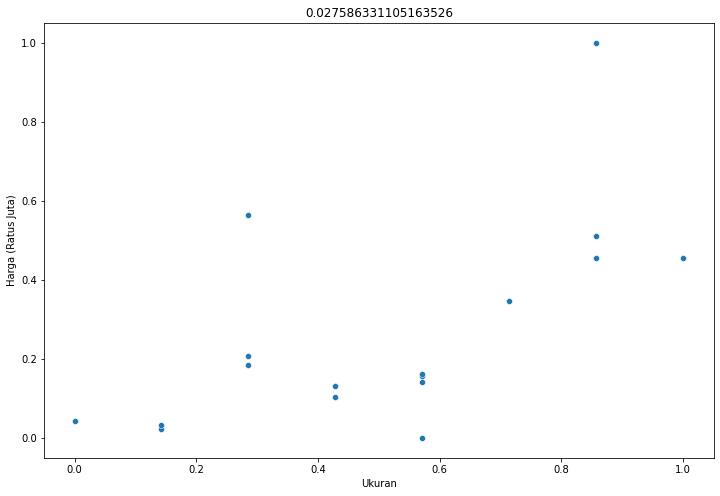

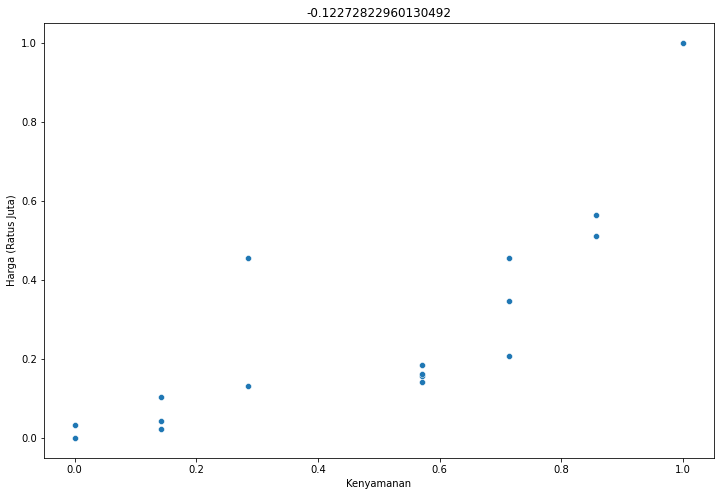

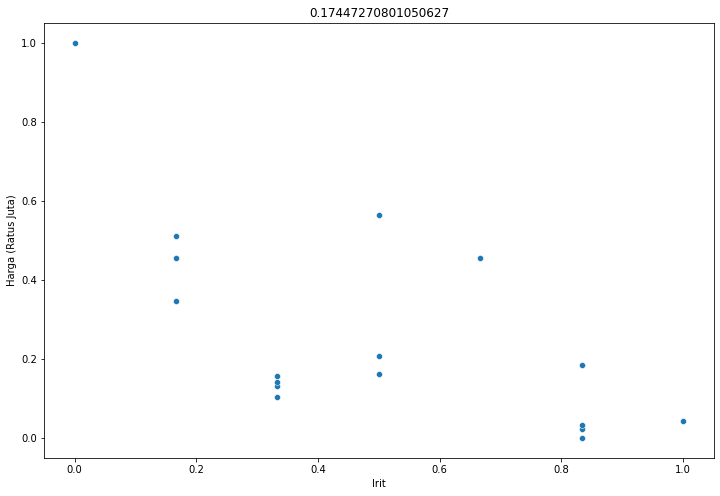

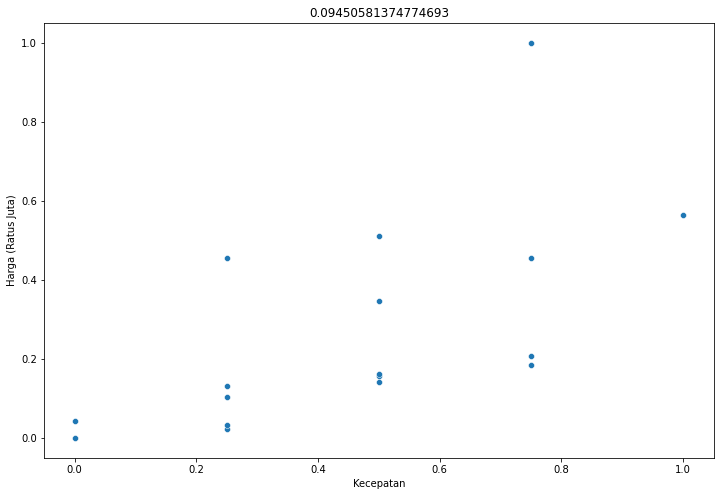

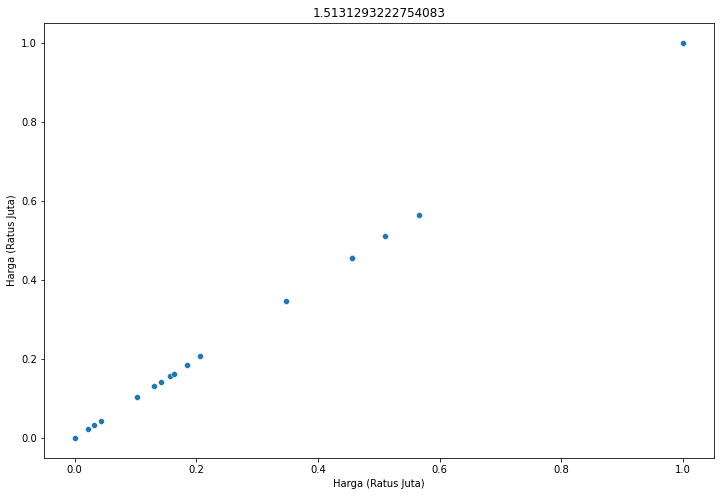

In [384]:
for i in df.columns:
  if i != 'Nama Mobil':
    plt.figure(figsize=(12,8))
    plt.title(df[i].skew())
    sns.scatterplot(x=i,y="Harga (Ratus Juta)",data = df)
    plt.show()

In [385]:
threeBestDistanceDict = getKNN(df,inputUser,k)

In [388]:
threeBestDistanceDict['Euclidean']

for nameDistance in threeBestDistanceDict.keys():
  tempDist = []
  tempCar = []
  for i in range(k):
    tempDist.append(threeBestDistanceDict[nameDistance][i][0])
    tempCar.append(threeBestDistanceDict[nameDistance][i][1])
  data = {
      'Car Name': tempCar,
      'Distance To Input': tempDist
  }
  data = pd.DataFrame(data)
  print(str(nameDistance) + ' Distance')
  print(data)
  print('')
  data.to_excel(str(nameDistance) + ' Distance.xlsx')

Euclidean Distance
        Car Name  Distance To Input
0         Livina           0.000000
1        Xpander           0.016304
2  Suzuki Ertiga           0.168078

Manhattan Distance
        Car Name  Distance To Input
0         Livina           0.000000
1        Xpander           0.016304
2  Suzuki Ertiga           0.188406

Minkowski Distance
        Car Name  Distance To Input
0         Livina           0.000000
1        Xpander           0.016304
2  Suzuki Ertiga           0.168078

Supremum Distance
        Car Name  Distance To Input
0         Livina           0.000000
1        Xpander           0.016304
2  Suzuki Ertiga           0.166667

